In [161]:
import os
import numpy as np
from os import listdir
from matplotlib.pyplot import imread
from skimage.transform import resize
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image
import math
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve2d as conv2, convolve

plt.rcParams['figure.figsize'] = (20, 8)

In [37]:
# Settings:
img_size = 64
grayscale_images = True
num_class = 10
test_size = 0.2


def get_img(data_path):
    # Getting image array from path:
    img = imread(data_path)
    img = resize(img, (img_size, img_size, 1 if grayscale_images else 3))
    return img


def get_dataset(dataset_path='Dataset'):
    # Getting all data from data path:
    try:
        X = np.load('X.npy')
        Y = np.load('Y.npy')
    except:
        labels = ['0','1','2','3','4','5','6','7','8','9']  # Geting labels
        X = []
        Y = []
        for i, label in enumerate(labels):
            datas_path = dataset_path + '/' + label
            for data in listdir(datas_path):
                img = get_img(datas_path + '/' + data)
                X.append(img)
                Y.append(i)
        # Create dateset:
        X = X = np.array(X).astype('float32')
        Y = np.array(Y).astype('float32')
        Y = to_categorical(Y, num_class)
        if not os.path.exists('npy_dataset/'):
            os.makedirs('npy_dataset/')
        np.save('npy_dataset/X.npy', X)
        np.save('npy_dataset/Y.npy', Y)
    X, X_test, Y, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    return X, X_test, Y, Y_test


if __name__ == '__main__':
    X, X_test, Y, Y_test = get_dataset()

In [79]:
def custom():
    
    Gx = np.array([[-0.25, -0.55, -0.25],[-0.55, 0.9, -0.55], [-0.25, -0.55,-0.25]] )
    return Gx

In [80]:
def customfiltering(img):

    custom_filter = custom()
    smooth_img = conv2(img, custom_filter,mode='same', boundary = 'fill')
    return np.array(smooth_img)

In [194]:
# cleaning
subset = [0,1,2,3,4,5,6,7,8,9,10,53,54,55,56,57,58,59,60,61,62,63]
def cleaning(img, rows):
    for row in rows:
        img[row][0:10] = 1
        img[row][53:64] = 1
    return img

In [42]:
def rgb2gray(rgb):
    '''
    RGB -> gray_scale
    '''
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [201]:
img = X[2]
new_img = []
threshold = 0.5
for el in img.flat: 
    if el > threshold: new_img.append(1)
    else: new_img.append(0)
    
new_img = np.array(new_img).reshape(64, 64)

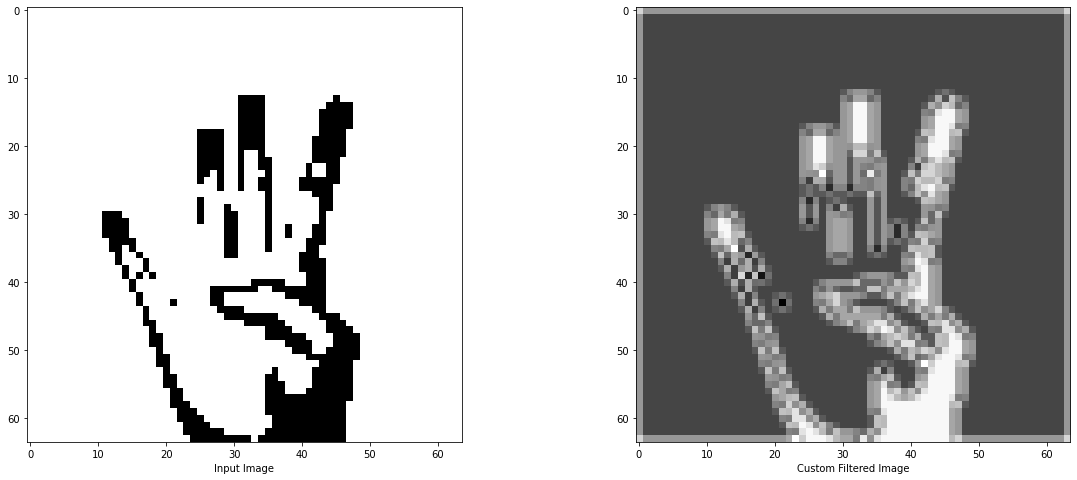

In [202]:
img = cleaning(new_img, subset)
smooth_img = customfiltering(img)
#print(smooth_img.shape)
plt.figure(2)
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Custom Filtered Image')
plt.sca(ax1)
plt.imshow(img, cmap='gray')
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray')
plt.show()